In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\mjb19\coding_projects\Internship_3_11_23\lpa_prediction\data\placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


# Finding info about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [4]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


'package' is measured in Lakhs Per Annum (LPA)

# Checking for missing values

In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

There are no missing values in the dataset

# Univariate Analysis
Checking the distributions of each variable in the dataset

## Boxplots

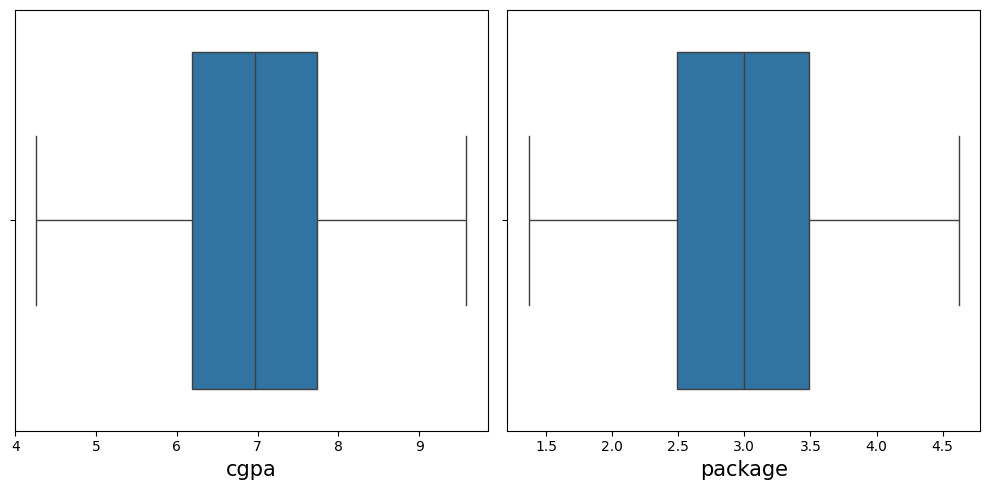

In [6]:
# Setting layout and size of the boxplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Creating boxplots
for column, subplot in zip(df.columns, axes.flatten()):
    sb.boxplot(x = df[column], ax = subplot)
    subplot.set_xlabel(column, fontsize = 15)

# Displaying boxplots
plt.tight_layout()
plt.show()

As there are no circular markings beyond the vertical lines, there are no outliers in the dataset.

## Density plots

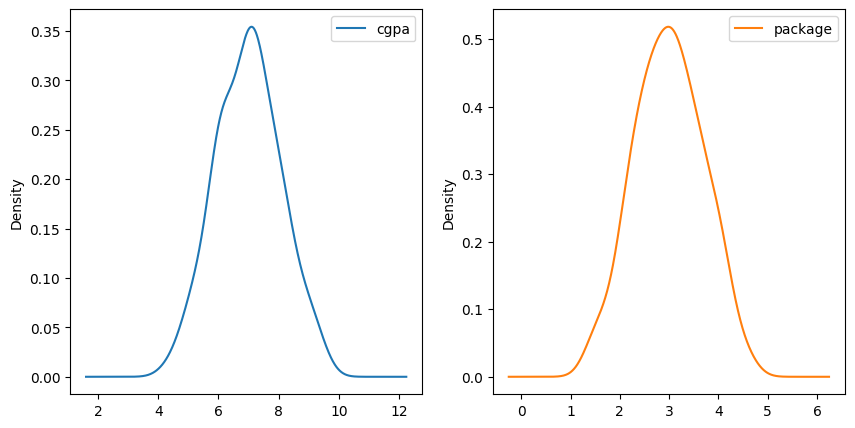

In [7]:
# Setting size of the density plots
plt.rcParams['figure.figsize'] = [10, 5]

# Creating the density plots and setting layout
df.plot(kind = 'density', subplots = True, sharex = False, layout = (1, 2))
plt.show()

As the data points are distributed around the middle, the dataset is neither left nor right skewed.

# Skew
Skewness of -0.5 to 0.5 is acceptable

In [8]:
df.skew()

cgpa       0.029655
package   -0.004815
dtype: float64

# Kurtosis

In [9]:
df.kurt()

cgpa      -0.356193
package   -0.487355
dtype: float64

# Bivariate Analysis
Analyzing the distributions of and relationships between the two variables 

<Axes: xlabel='cgpa', ylabel='package'>

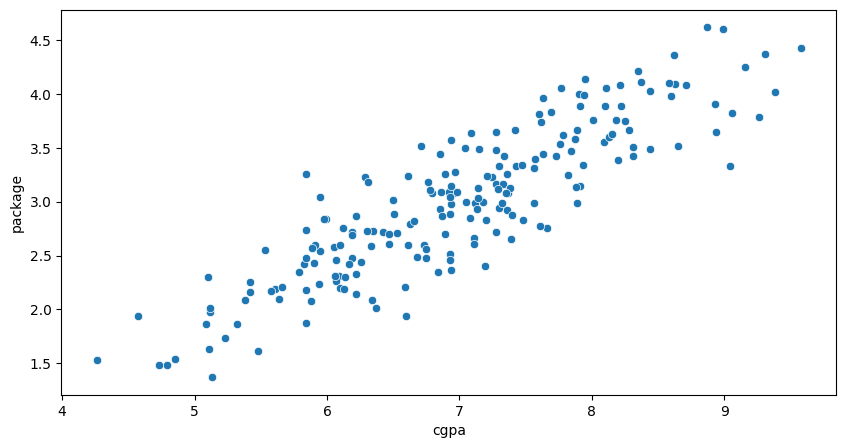

In [10]:
sb.scatterplot(df, x='cgpa', y='package')

By observing the plot, we observe that there is an overall linear relationship between cgpa and lpa.

# Correlation
By measuring the correlation between the two variables, we can see how cgpa affects package.

In [11]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


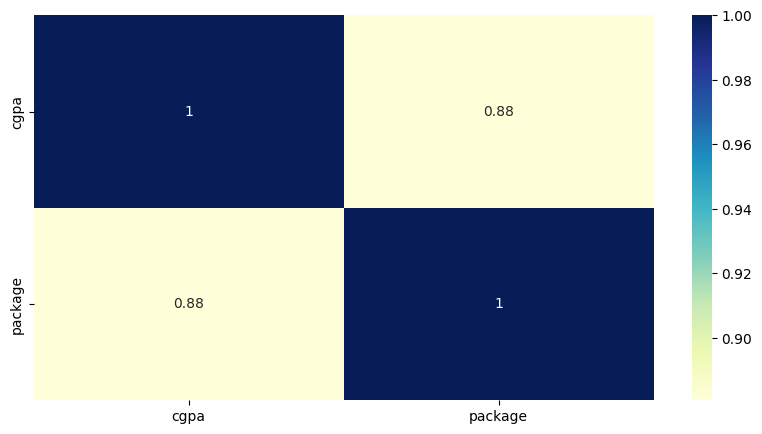

In [12]:
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

Since the correlation between cgpa and package is high (0.88), we can use cgpa to predict package.

# Preparing the data for the model

ML models assume the data given to be normally distributed (mean = 0, standard deviation = 1). We use `PowerTransformer` to normalize the data to work with the model's assumptions.

In [13]:
pt = PowerTransformer().fit_transform(df)
pt

array([[-8.52489313e-02,  3.86630047e-01],
       [-1.77283987e+00, -1.47839953e+00],
       [ 7.80610653e-01,  3.72200300e-01],
       [ 4.09766491e-01,  9.76609433e-01],
       [-3.83645385e-02,  8.32999872e-01],
       [ 8.45275592e-01, -3.68015766e-03],
       [-2.35546287e-01, -5.70207543e-01],
       [-2.16736638e-01, -7.45225075e-01],
       [-8.40984540e-01, -9.93770436e-01],
       [ 1.23186329e+00,  7.46746739e-01],
       [-1.57918765e+00, -1.65538547e+00],
       [-3.48540916e-01, -5.70207543e-01],
       [ 1.80743929e+00,  9.47901931e-01],
       [-4.77382654e-02, -1.48623902e-01],
       [ 6.97369495e-01,  6.17241732e-01],
       [ 2.51452508e-01,  3.43334884e-01],
       [-1.32172890e-01, -9.35223832e-01],
       [-1.52125207e+00, -1.31652614e+00],
       [-3.83645385e-02, -1.81649514e-02],
       [ 4.65540062e-01, -2.35693734e-01],
       [ 2.79421581e-01,  2.42243234e-01],
       [-1.22784919e-01, -9.06207417e-02],
       [-7.93430418e-01, -1.00841349e+00],
       [-7.

In [14]:
# Creating a DataFrame from the normalized data.
df_pt = pd.DataFrame(data=pt, columns=df.columns)
df_pt

,cgpa,package
0,-0.085249,0.386630
1,-1.772840,-1.478400
2,0.780611,0.372200
3,0.409766,0.976609
4,-0.038365,0.833000
...,...,...
195,-0.047738,-0.774428
196,-1.031651,-0.613930
197,0.214139,0.357769
198,0.604745,1.392082


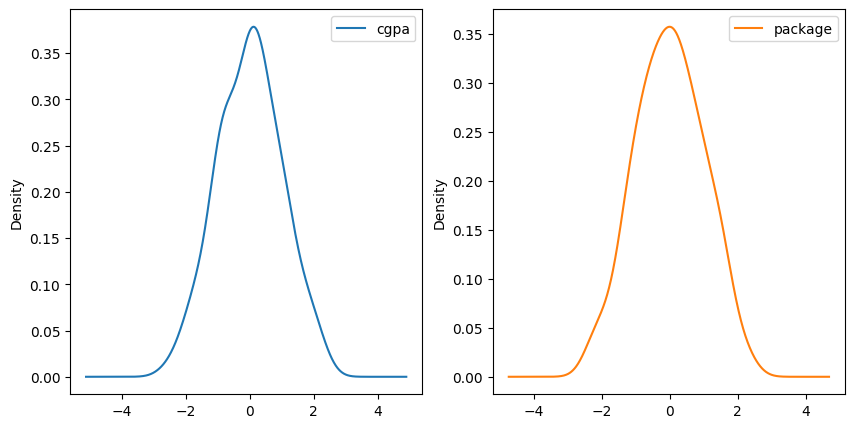

In [15]:
# Setting size of the density plots
plt.rcParams['figure.figsize'] = [10, 5]

# Creating the density plots and setting layout
df_pt.plot(kind = 'density', subplots = True, sharex = False, layout = (1, 2))
plt.show()

In [16]:
# Splitting the data into input (X) and output (y) variables.

X = df_pt['cgpa']
y = df_pt['package']
X = sm.tools.add_constant(X)

In [17]:
X

,const,cgpa
0,1.0,-0.085249
1,1.0,-1.772840
2,1.0,0.780611
3,1.0,0.409766
4,1.0,-0.038365
...,...,...
195,1.0,-0.047738
196,1.0,-1.031651
197,1.0,0.214139
198,1.0,0.604745


In [18]:
y

0      0.386630
1     -1.478400
2      0.372200
3      0.976609
4      0.833000
         ...   
195   -0.774428
196   -0.613930
197    0.357769
198    1.392082
199   -0.964492
Name: package, Length: 200, dtype: float64

In [19]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now the data is ready for the linear regression model.

# Training and evaluating the linear regression model

Here we are using linear regression with Ordinary Least Squares (OLS) method.

OLS minimizes the sum of squared residuals. Residuals are the differences between the actual Y values and the predicted Y values on the regression line. By minimizing the sum of squared residuals, we find the line that best fits the data points.

In [20]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                package   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     499.2
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.10e-47
Time:                        14:26:10   Log-Likelihood:                -95.779
No. Observations:                 140   AIC:                             195.6
Df Residuals:                     138   BIC:                             201.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0131      0.041      0.321      0.7

## Definition of R squared:
The coefficient of determination, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

For r-squared and adjusted r-squared, the values can range between 0 and 1. The closer the value is to 1, the more accurate the model is.

Here, the values are around 0.8. This indicates that the model is accurate.

In [21]:
y_pred = model.predict(X_test)
y_pred

95    -0.277977
15     0.235089
30     0.325571
158   -0.847139
128    0.791945
115    1.133047
69     0.276237
170   -0.620299
174    0.292687
45     0.743044
66    -1.560636
182   -0.906139
165    1.019578
78    -0.311265
186    0.718577
177    0.103192
56    -0.939890
152    0.333789
82    -1.159915
68     0.489679
124   -0.754584
16    -0.103597
148    0.497871
93    -0.145059
65     0.522439
60    -1.134469
84    -2.296095
67    -0.377910
125    0.300910
132   -0.939890
9      1.100650
18    -0.020777
55     1.011464
75     0.004041
150   -0.553306
104    0.538811
135   -0.720975
137    0.144447
164    1.705098
76    -0.020777
79     0.177427
197    0.202147
38     1.351246
24    -0.361240
122   -1.552068
195   -0.029053
29     0.152694
19     0.424098
143   -1.784061
86     0.530626
114   -0.939890
173   -0.178254
5      0.759349
126   -0.880844
117    0.127949
73     1.205872
140    0.775650
98     0.596075
172   -0.029053
96     0.119698
dtype: float64

In [22]:
X_test

,const,cgpa
95,1.0,-0.329692
15,1.0,0.251453
30,1.0,0.353940
158,1.0,-0.974375
128,1.0,0.882197
115,1.0,1.268559
69,1.0,0.298060
170,1.0,-0.717436
174,1.0,0.316693
45,1.0,0.826807


## Definition of Mean Squared Error:
The average of the squared differences between the predicted and actual values.

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.20973617177852286

## Definition of Mean Absolute Error:
The average of the absolute differences between the predicted and actual values.

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.3777904535118784

## Definition of Mean Absolute Percentage Error:
The average of the absolute percentage differences between the predicted and actual values.

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

8.7951525529434

For the above 3 metrics, lower values are better. Since the values are low (less than 10% error), the model is accurate.